In [191]:
# 1. Objective : Data loading and Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans
pd.set_option("display.max_columns", None)

In [192]:
df = pd.read_csv(r"D:\Oasis\Level 1 - Project 2\ifood_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [193]:
df.shape

(2205, 39)

In [194]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [195]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [196]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,66,2781,0,1,0,0,0,0,0,0,0,1,151,130,0


In [197]:
missing_values = df.isnull().sum()
print(missing_values)

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [198]:
# 2. Objective : Basic statistics (Mean, Median, Mode and Standard Deviation)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


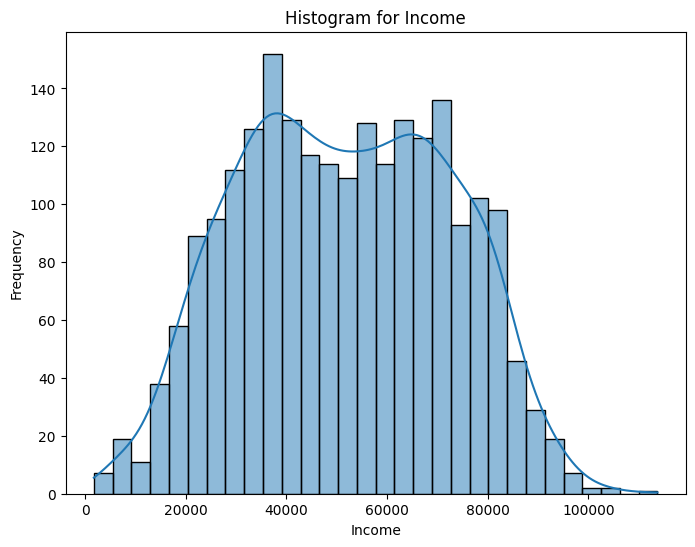

In [199]:
# Histogram for Income distribution
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

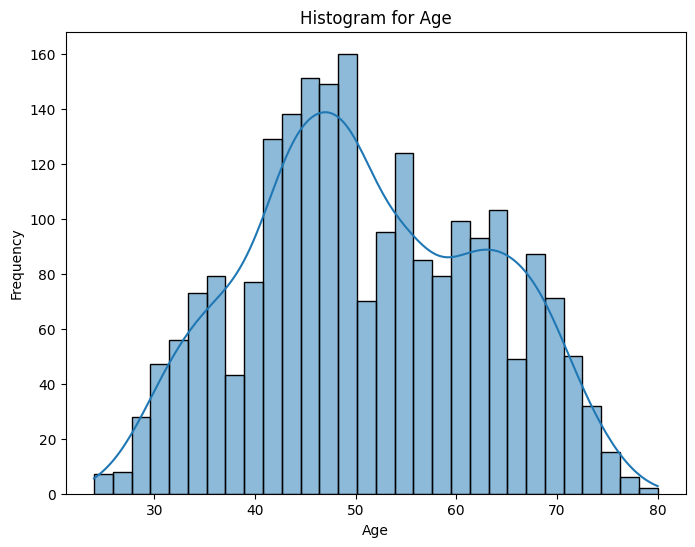

In [200]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [201]:
# Creating a new column that combines all the information relating to Marital status
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

In [202]:
# Creating another colum that combines all the information related to education
def education_status(row):
    if row['education_2n Cycle'] == 1:
        return '2nd_Cycle'
    elif row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_Graduation'] == 1:
        return 'Graduate'
    elif row['education_Master'] == 1:
        return 'Masters'
    elif row['education_PhD'] == 1:
        return 'PhD'
    else:
        return 'Unknown'
df['Education_Level'] = df.apply(education_status, axis=1)

Text(0, 0.5, 'Total Amount spend on Products purchases')

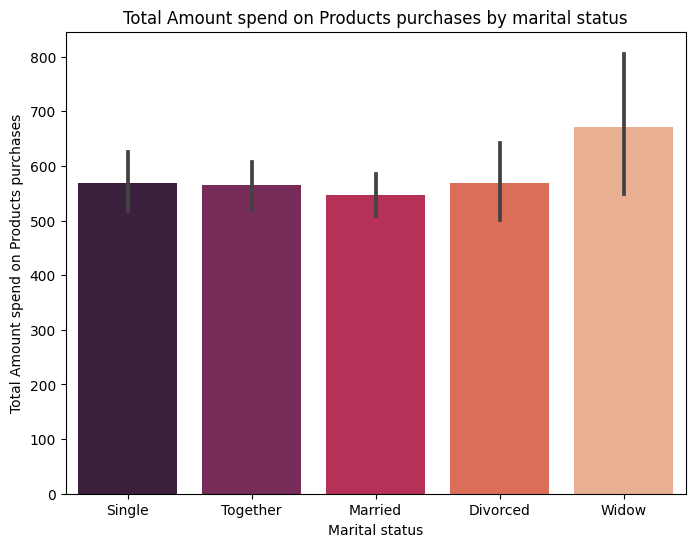

In [203]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='rocket')
plt.title('Total Amount spend on Products purchases by marital status')
plt.xlabel('Marital status')
plt.ylabel('Total Amount spend on Products purchases')

Text(0, 0.5, 'Total Amount spend on Products purchases')

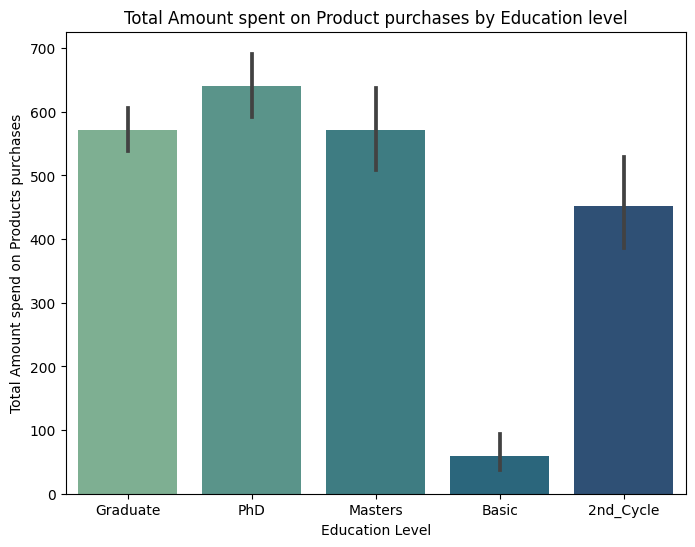

In [204]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Education_Level', y='MntTotal', data=df, palette='crest')
plt.title('Total Amount spent on Product purchases by Education level')
plt.xlabel('Education Level')
plt.ylabel('Total Amount spend on Products purchases')

In [205]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)

In [206]:
# K-Means Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


In [207]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [208]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

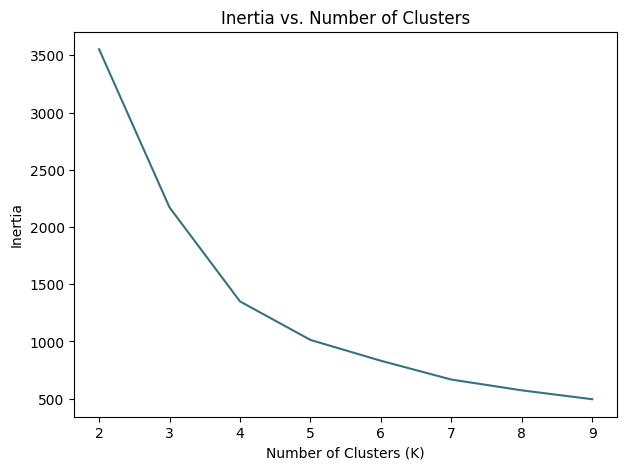

In [209]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [210]:
# From the graph above, we deduce that the silhouette is 4 clusters.

In [211]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

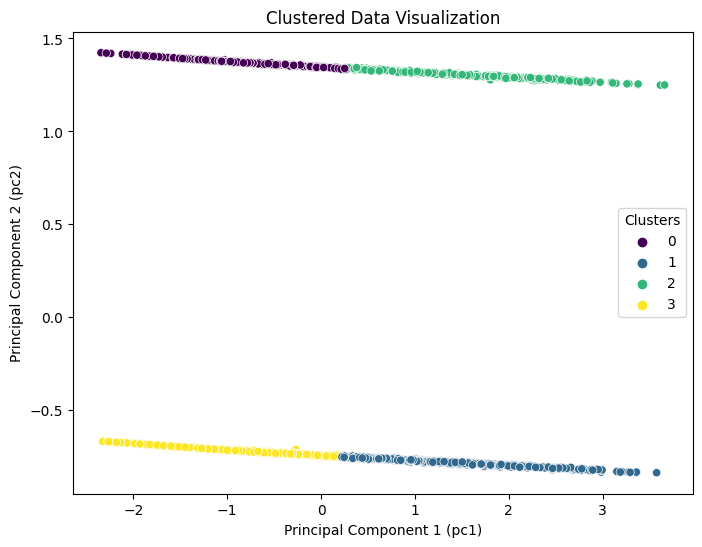

In [212]:
# Exploration of clusters
# Visualisation of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [213]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37332.339956,150.761589,0.0
1,71865.747350,1150.915194,1.0
2,72059.439394,1167.306061,0.0
3,37920.024533,158.845794,1.0


In [214]:
# Mean consumption of different product types by cluster
products_column = ['MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
meanconsumption_data = df.groupby('Cluster')[products_column].mean().reset_index()
meanconsumption_data.head()

,Cluster,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
1,1,1080.148410,624.773852,52.750883,342.715548,75.738516,54.936396,70.766784
2,2,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,134.119159,92.410047,7.660047,39.426402,11.417056,7.932243,24.726636


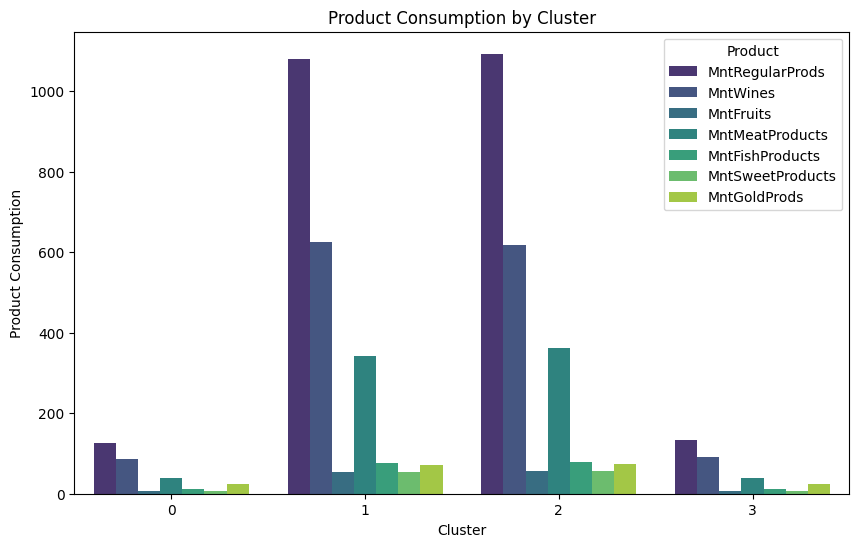

In [215]:
melted_data = pd.melt(meanconsumption_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Text(0, 0.5, 'Total amount spent on product purchases')

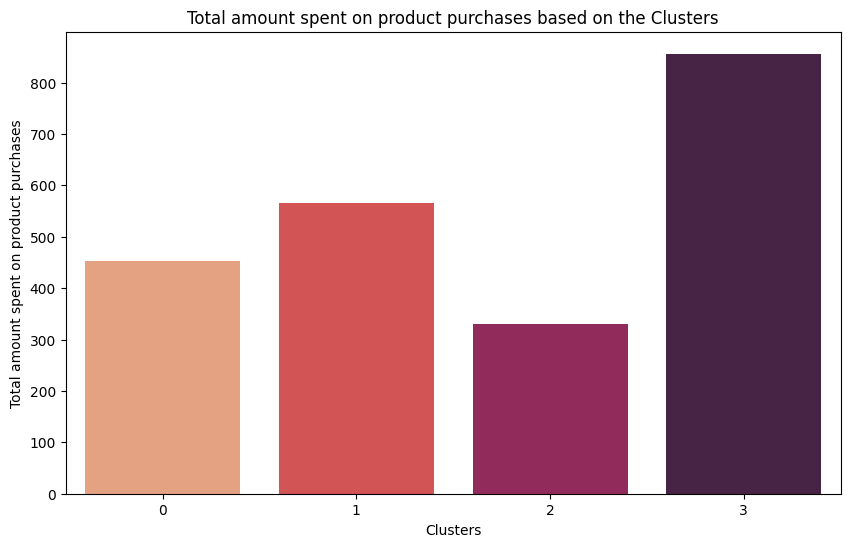

In [216]:
# Cluster Sizes
amountspent_cluster = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='MntTotal', data=amountspent_cluster, palette = 'rocket_r')
plt.title('Total amount spent on product purchases based on the Clusters')
plt.xlabel('Clusters')
plt.ylabel('Total amount spent on product purchases')


Text(0, 0.5, 'Income')

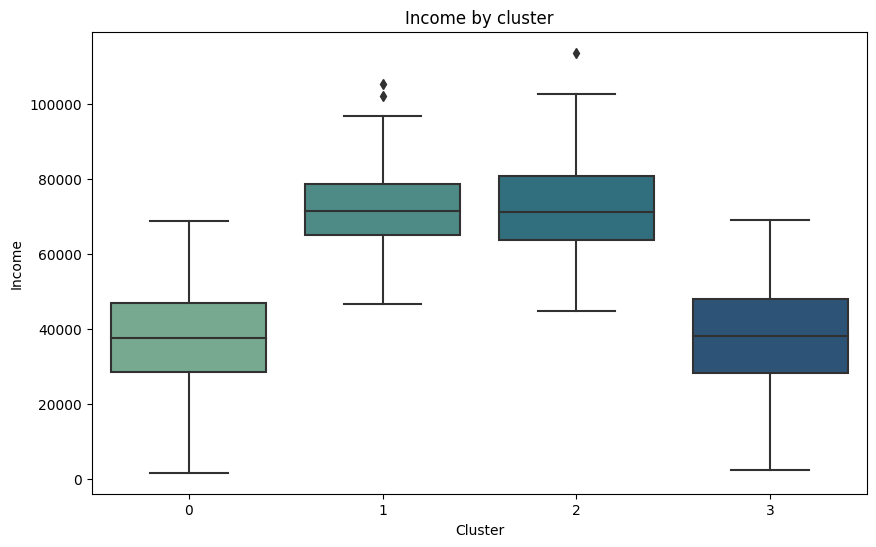

In [217]:
# Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='crest')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')


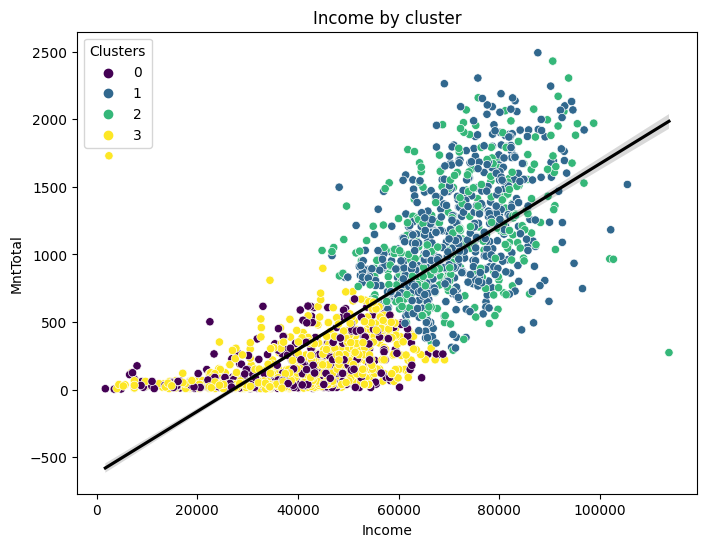

In [218]:
# Scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='Cluster', palette='viridis')
# Line of best fit
sns.regplot(x='Income', y='MntTotal', data=df, scatter=False, color='black')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')
plt.show()

In [1]:
# Conclusion
# K-means Clustering Analysis Results

# We found 4 different types of customers based on their spending and relationship status.
# Here's what we know about them:

# Cluster 0: 26% are high spenders and in a relationship.
# Strategy: Offer them high-quality wines and use family images in ads.

# Cluster 1: 21% spend less and are single.
# Strategy: Use discounts and loyalty programs to encourage more purchases.

# Cluster 2: 15% are high spenders and single.
# Strategy: Market wines and use images of parties or solo travel in ads.

# Cluster 3: 39% spend less and are in a relationship.
# Strategy: Offer family deals to get them to buy more.

# Print the results
print("Cluster 0: High spenders in a relationship. Target with wine promos and family ads.")
print("Cluster 1: Low spenders who are single. Attract with discounts and loyalty programs.")
print("Cluster 2: Single high spenders. Advertise wines and fun images.")
print("Cluster 3: Low spenders in a relationship. Offer family discounts.")

Cluster 0: High spenders in a relationship. Target with wine promos and family ads.
Cluster 1: Low spenders who are single. Attract with discounts and loyalty programs.
Cluster 2: Single high spenders. Advertise wines and fun images.
Cluster 3: Low spenders in a relationship. Offer family discounts.
